In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the train dataset
train_df = pd.read_csv("/content/drive/MyDrive/train.csv")
X_train = train_df['pixels']
y_train = train_df['emotion']

# Preprocess the data
X_train = X_train.apply(lambda x: pd.Series(x.split(' ')).astype(float))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/test.csv")
X_test = test_df['pixels']

# Preprocess the test data
X_test = X_test.apply(lambda x: pd.Series(x.split(' ')).astype(float))
X_test_scaled = scaler.transform(X_test)

# Predict on the test dataset
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the model on training dataset
train_accuracy = accuracy_score(y_train, clf.predict(X_train_scaled))
print("Train Accuracy:", train_accuracy)

# Load the icml_face_data dataset
icml_df = pd.read_csv("/content/drive/MyDrive/icml_face_data.csv")
X_icml = icml_df[' pixels']
y_icml = icml_df['emotion']

# Preprocess the icml_face_data
X_icml = X_icml.apply(lambda x: pd.Series(x.split(' ')).astype(float))
X_icml_scaled = scaler.transform(X_icml)

# Predict on the icml_face_data dataset
y_icml_pred = clf.predict(X_icml_scaled)

# Calculate the accuracy of the model on icml_face_data dataset
icml_accuracy = accuracy_score(y_icml, y_icml_pred)
print("icml_face_data Accuracy:", icml_accuracy)

Train Accuracy: 0.9985022118499425
icml_face_data Accuracy: 0.8926073508512832


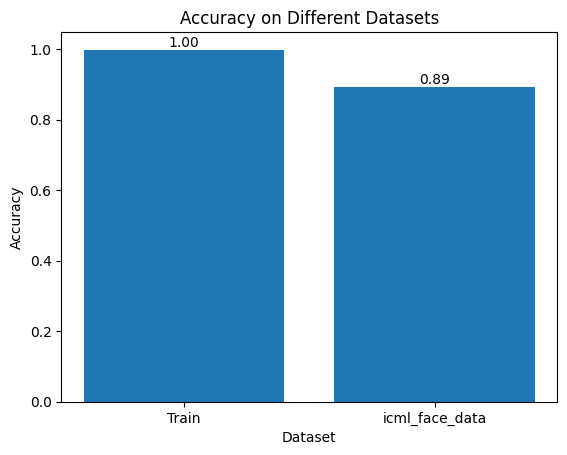

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracies
accuracies = [train_accuracy, icml_accuracy]

# Define the datasets
datasets = ['Train', 'icml_face_data']

# Create a bar plot
plt.bar(datasets, accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy on Different Datasets')

# Add the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

